In [1]:
# importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [2]:
disease_df = pd.read_csv('/content/framingham (1).csv')

In [3]:
disease_df.drop(columns=['education'], inplace=True, axis = 1)

In [4]:
disease_df.rename(columns={'male':'gender_male'}, inplace=True)

In [5]:
disease_df.head()

,gender_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [6]:
disease_df.dropna(axis=0, inplace=True)
#disease_df

In [7]:
print(disease_df.TenYearCHD.value_counts())

TenYearCHD
0    3179
1     572
Name: count, dtype: int64


In [8]:
X = np.asarray(disease_df[["age","gender_male", "cigsPerDay", "totChol", "sysBP", "glucose"]])
Y = np.asarray(disease_df["TenYearCHD"])

In [9]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 4)

print("train_set:", X_train.shape, Y_train.shape)
print("test_set:", X_test.shape, Y_test.shape)

train_set: (2625, 6) (2625,)
test_set: (1126, 6) (1126,)


/tmp/ipython-input-2831617663.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=disease_df,palette="BuGn_r")


<function matplotlib.pyplot.show(close=None, block=None)>

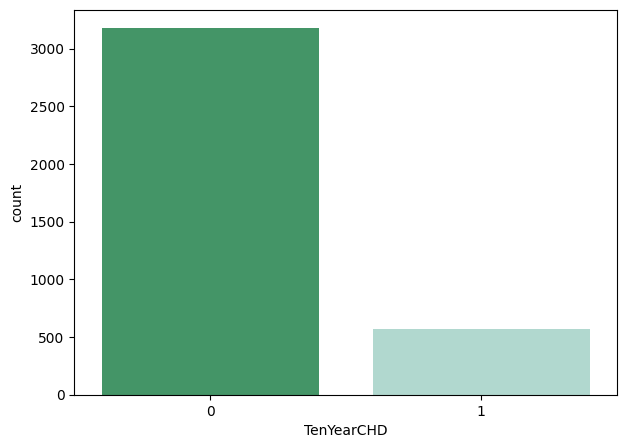

In [11]:
plt.figure(
    figsize=(7, 5)
)

sns.countplot(x='TenYearCHD', data=disease_df,palette="BuGn_r")
plt.show

/tmp/ipython-input-756506048.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cigsPerDay', data=disease_df,palette="BuGn_r")


<function matplotlib.pyplot.show(close=None, block=None)>

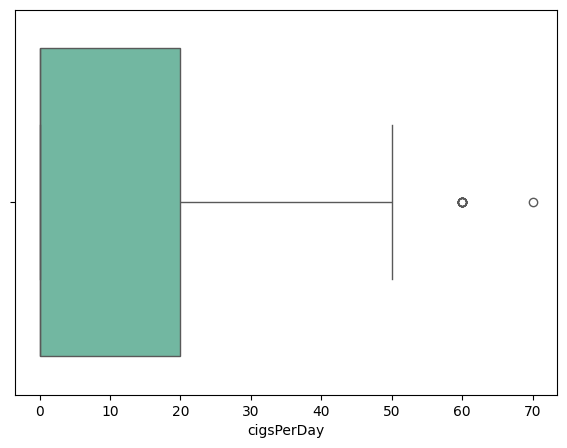

In [12]:
plt.figure(
    figsize=(7, 5)
)

sns.boxplot(x='cigsPerDay', data=disease_df,palette="BuGn_r")
plt.show

/tmp/ipython-input-3277259079.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender_male', data=disease_df,palette="BuGn_r")


<function matplotlib.pyplot.show(close=None, block=None)>

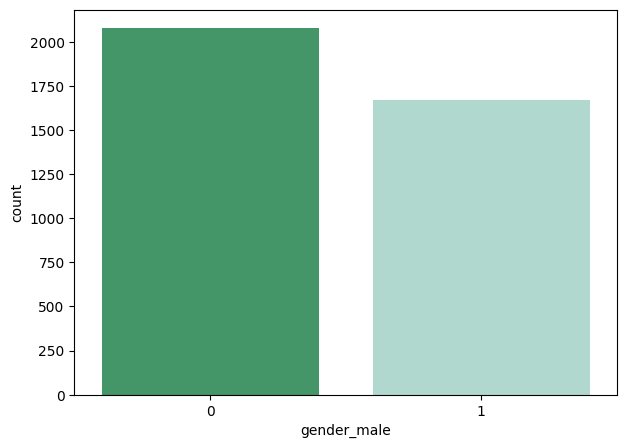

In [13]:
plt.figure(
    figsize=(7, 5)
)

sns.countplot(x='gender_male', data=disease_df,palette="BuGn_r")
plt.show

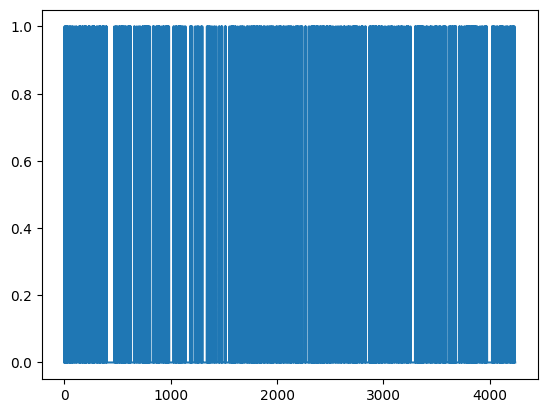

In [14]:
# blue indicates the absence of heart disease, white is with heart disease
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [16]:
#storing logistic regression model in variable logreg
logreg = LogisticRegression()
#add training data in model
logreg.fit(X_train, Y_train)
#testing dataset
y_pred = logreg.predict(X_test)

In [17]:
print("accuracy_score of the model = ", accuracy_score(Y_test, y_pred))

accuracy_score of the model =  0.8490230905861457


In [18]:
from sklearn.metrics import confusion_matrix, classification_report

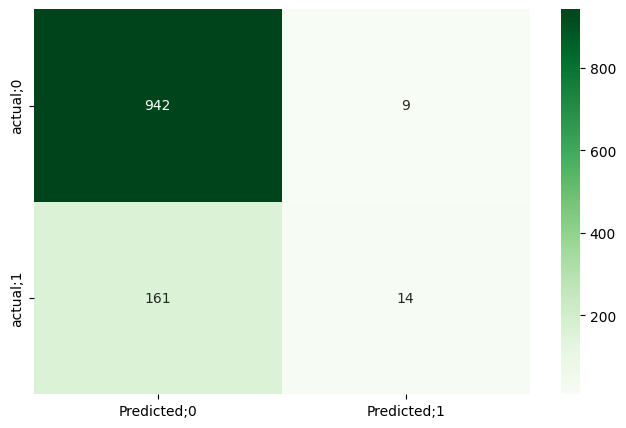

In [19]:
# the darker the color the more the machine understands it to be true
cm = confusion_matrix(Y_test, y_pred)
conf_matrix = pd.DataFrame(data=cm, columns=["Predicted;0", "Predicted;1"],index=["actual;0", "actual;1"])

plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True, fmt = 'd', cmap="Greens")

plt.show()